# **Data-Cleaning**
##### **Author**: Shriya Dale
##### **Class**: DS 4003 
## **Dataset Selection**
For this analysis, I've chosen to work with a comprehensive dataset sourced from MenuStat, a robust nutritional database that catalogues thousands of food items offered by some of the largest chain restaurants across the United States. This dataset holds significant relevance due to the pivotal role that out-of-home dining plays in shaping the American diet. Studies have shown that meals consumed away from home contribute substantially to daily caloric intake, constituting approximately one-third of total calories consumed, and represent nearly half of the average household's food expenditure. My interest lies in delving deep into the diverse spectrum of nutrients present in these restaurant offerings and exploring how they contribute to overall dietary patterns. I'm interested in creating visualizations that showcase the nutritional composition of various foods in popular chains in America. 
## **Data Provenance**
This dataset was orginally found on MenuStat, which is a platform that aggregates nutrition information posted on restaurant websites since 2012, with yearly datasets with necessary updates being posted. This dataset is from 2022 as it is the latest dataset available on their website. It provides a valuable resource for researchers and others interested in the nutritional content of restaurant foods and beverages. Originally conceived as a resource for researchers, policymakers, and health professionals, MenuStat's primary objective is to provide comprehensive insights into the nutritional landscape of foods and beverages offered by various restaurant chains. It was built by the New York City Department of Health and Mental Hygiene, but now MenuStat is now run by Harvard Pilgrim Health Care Institute with funding from the National Institutes of Health.



## **Introduction**
Below is the data cleaning that was performed for the dataset. The main goal was to have tidy data, meaning that variables are present only in columns, observational units are in rows, and each observational unit formed a row. Data types were adjusted and duplicates were removed. Outliers were removed based on context (for example, if something had 1000 g of protein, it was removed); others were kept because content in food varies. Missing values were imputated using either the median or mean.

In [295]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [296]:
df = pd.read_csv("foodnutrient.csv", low_memory=False) #because dtypes weren't consistent, low_memory was set to False
df.head() #display the first 5 rows of the dataframe

,matched_2021,new_item_2022,menu_item_id,food_category,restaurant,item_name,item_description,serving_size,serving_size_text,serving_size_unit,...,calories_text,total_fat_text,saturated_fat_text,trans_fat_text,cholesterol_text,sodium_text,carbohydrates_text,dietary_fiber_text,sugar_text,protein_text
0,1,0,10012,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,10013,Soup,Applebee's,Tomato Basil Soup,"Tomato Basil Soup, Soups",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,10018,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,10020,Salads,Applebee's,House Salad,"House Salad, Side Salads",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,10023,Salads,Applebee's,Oriental Chicken Salad,"Oriental Chicken Salad, 1 Breadstick, Salad Dr...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
df.columns #display the columns of the dataframe - duplicate columns were found 

Index(['matched_2021', 'new_item_2022', 'menu_item_id', 'food_category',
       'restaurant', 'item_name', 'item_description', 'serving_size',
       'serving_size_text', 'serving_size_unit', 'serving_size_household',
       'calories', 'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol',
       'sodium', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein',
       'potassium', 'notes', 'calories_text', 'total_fat_text',
       'saturated_fat_text', 'trans_fat_text', 'cholesterol_text',
       'sodium_text', 'carbohydrates_text', 'dietary_fiber_text', 'sugar_text',
       'protein_text'],
      dtype='object')

In [298]:
df.describe() #display the summary statistics of the dataframef

,matched_2021,new_item_2022,menu_item_id,total_fat,potassium
count,26238.000000,26238.000000,26238.000000,25536.000000,1787.000000
mean,0.754402,0.245560,655349.719415,18.113323,389.413039
std,0.430449,0.430427,405670.148315,34.090376,409.155175
min,0.000000,0.000000,7.000000,0.000000,0.000000
25%,1.000000,0.000000,170325.250000,0.000000,81.000000
50%,1.000000,0.000000,938183.000000,7.000000,286.000000
75%,1.000000,0.000000,951356.750000,23.000000,557.500000
max,1.000000,1.000000,957946.000000,746.000000,2908.000000


## **Converting Datatypes**

In [299]:
#noticed that saturated fat and trans fat have both ints and floats in the columns
#also noticed that when doing df.describe() most of the columns wouldn't show up, so all numeric columns should be converted to floats
df['saturated_fat'] = pd.to_numeric(df['saturated_fat'], errors='coerce')
df['trans_fat'] = pd.to_numeric(df['trans_fat'], errors='coerce')
df['cholesterol'] = pd.to_numeric(df['cholesterol'], errors='coerce')
df['calories'] = pd.to_numeric(df['calories'], errors='coerce')
df['total_fat'] = pd.to_numeric(df['total_fat'], errors='coerce')
df['sodium'] = pd.to_numeric(df['sodium'], errors='coerce')
df['carbohydrates'] = pd.to_numeric(df['carbohydrates'], errors='coerce')
df['dietary_fiber'] = pd.to_numeric(df['dietary_fiber'], errors='coerce')
df['sugar'] = pd.to_numeric(df['sugar'], errors='coerce')
df['protein'] = pd.to_numeric(df['protein'], errors='coerce')
df.head() #check to see if the columns were converted to floats

,matched_2021,new_item_2022,menu_item_id,food_category,restaurant,item_name,item_description,serving_size,serving_size_text,serving_size_unit,...,calories_text,total_fat_text,saturated_fat_text,trans_fat_text,cholesterol_text,sodium_text,carbohydrates_text,dietary_fiber_text,sugar_text,protein_text
0,1,0,10012,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,10013,Soup,Applebee's,Tomato Basil Soup,"Tomato Basil Soup, Soups",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,0,10018,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0,10020,Salads,Applebee's,House Salad,"House Salad, Side Salads",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0,10023,Salads,Applebee's,Oriental Chicken Salad,"Oriental Chicken Salad, 1 Breadstick, Salad Dr...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Addressing missing values and outliers**

In [300]:
#finds the missing values in the dataframe
missing_values = df.isnull().sum() 
print(missing_values)

matched_2021                  0
new_item_2022                 0
menu_item_id                  0
food_category                 0
restaurant                    1
item_name                     0
item_description              0
serving_size              13573
serving_size_text         26189
serving_size_unit         14024
serving_size_household    22031
calories                    456
total_fat                   702
saturated_fat               821
trans_fat                  2246
cholesterol                1044
sodium                      984
carbohydrates               968
dietary_fiber              1436
sugar                      1050
protein                    1017
potassium                 24451
notes                     26198
calories_text             26044
total_fat_text            26230
saturated_fat_text        26230
trans_fat_text            26232
cholesterol_text          26232
sodium_text               26230
carbohydrates_text        26230
dietary_fiber_text        26232
sugar_te

All duplicate columns were removed, along with the four columns that pertain 'serving_size' because there were too many missing values.

In [301]:
indices_to_drop = [0, 1, 7, 8, 9, 10, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]  #list of column indices to drop - main reasons are high numbers of missing values + redundancy in data
df.drop(df.columns[indices_to_drop], axis=1, inplace=True) #setting inPlace to True modifies the dataframe
df.head() #check to see if the columns were dropped

,menu_item_id,food_category,restaurant,item_name,item_description,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
0,10012,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",370.0,22.0,12.0,0.0,55.0,1250.0,26.0,2.0,9.0,16.0
1,10013,Soup,Applebee's,Tomato Basil Soup,"Tomato Basil Soup, Soups",220.0,12.0,4.5,1.5,25.0,1270.0,22.0,2.0,9.0,5.0
2,10018,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",280.0,15.0,4.0,0.0,35.0,930.0,26.0,2.0,3.0,11.0
3,10020,Salads,Applebee's,House Salad,"House Salad, Side Salads",130.0,7.0,2.5,0.0,10.0,230.0,14.0,2.0,4.0,6.0
4,10023,Salads,Applebee's,Oriental Chicken Salad,"Oriental Chicken Salad, 1 Breadstick, Salad Dr...",1560.0,103.0,17.0,1.0,65.0,1610.0,120.0,12.0,44.0,40.0


In [302]:
#the restaurant column has one missing value, so the row will be dropped
df = df.dropna(subset=['restaurant'])

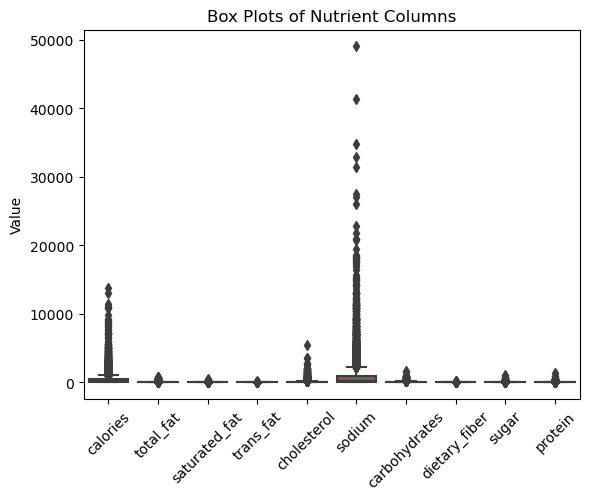

In [303]:
#check for outliers to see how to replace missing values, the columns used have numerical data and are continuous
numerical_columns = ['calories', 'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol', 'sodium', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein']
fig, ax = plt.subplots()
sns.boxplot(data=df[numerical_columns], ax=ax)
plt.title("Box Plots of Nutrient Columns")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

In [304]:
#calculate Q1, Q3, and IQR to find the outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
#sets the threshold for identifying outliers
threshold = 1.5
#finds the outliers
outliers = ((df[numerical_columns] < (Q1 - threshold * IQR)) | (df[numerical_columns] > (Q3 + threshold * IQR)))
df = df[~outliers.any(axis=1)]
print("Original DataFrame shape:", df.shape)

Original DataFrame shape: (17745, 15)


In [305]:
#the calories and sodium columns have a higher deviation than the other columns, so median imputation will be used; the remaining columns will use mean imputation
df['calories'].fillna(df['calories'].median(), inplace=True)
df['sodium'].fillna(df['sodium'].median(), inplace=True)
df['total_fat'].fillna(df['total_fat'].mean(), inplace=True)
df['saturated_fat'].fillna(df['saturated_fat'].mean(), inplace=True)
df['trans_fat'].fillna(df['trans_fat'].mean(), inplace=True)
df['cholesterol'].fillna(df['cholesterol'].mean(), inplace=True)
df['carbohydrates'].fillna(df['carbohydrates'].mean(), inplace=True)
df['dietary_fiber'].fillna(df['dietary_fiber'].mean(), inplace=True)
df['sugar'].fillna(df['sugar'].mean(), inplace=True)
df['protein'].fillna(df['protein'].mean(), inplace=True)
df.head()

,menu_item_id,food_category,restaurant,item_name,item_description,calories,total_fat,saturated_fat,trans_fat,cholesterol,sodium,carbohydrates,dietary_fiber,sugar,protein
0,10012,Soup,Applebee's,French Onion Soup,"French Onion Soup, Soups",370.0,22.0,12.0,0.0,55.0,1250.0,26.0,2.0,9.0,16.0
2,10018,Soup,Applebee's,Chicken Tortilla Soup,"Chicken Tortilla Soup, Soups",280.0,15.0,4.0,0.0,35.0,930.0,26.0,2.0,3.0,11.0
3,10020,Salads,Applebee's,House Salad,"House Salad, Side Salads",130.0,7.0,2.5,0.0,10.0,230.0,14.0,2.0,4.0,6.0
5,10025,Salads,Applebee's,Caesar Salad,"Caesar Salad, Side Salads",230.0,18.0,3.5,0.0,15.0,410.0,13.0,2.0,3.0,5.0
8,10094,Sandwiches,Applebee's,Kids Corn Dog,"Kids Corn Dog, Kids Main Meal",180.0,9.0,2.0,0.0,20.0,400.0,19.0,1.0,5.0,7.0


In [306]:
#all columns have been cleaned and missing values have been replaced
descriptive_stats = df.describe()
print(descriptive_stats)

        menu_item_id      calories     total_fat  saturated_fat  trans_fat  \
count   17745.000000  17745.000000  17745.000000   17745.000000    17745.0   
mean   654040.877205    182.413474      6.701037       2.296991        0.0   
std    404839.665436    161.478301      9.283140       3.282815        0.0   
min         7.000000      0.000000      0.000000       0.000000        0.0   
25%    170440.000000     50.000000      0.000000       0.000000        0.0   
50%    937362.000000    150.000000      2.500000       1.000000        0.0   
75%    950889.000000    260.000000     10.000000       3.500000        0.0   
max    957945.000000   1030.000000     57.000000      20.000000        0.0   

        cholesterol        sodium  carbohydrates  dietary_fiber         sugar  \
count  17745.000000  17745.000000   17745.000000   17745.000000  17745.000000   
mean      16.139582    311.586109      22.172276       0.763671     12.580333   
std       26.315310    428.783035      21.173833      

## **Addressing Duplicates**

In [307]:
duplicate_rows = df.duplicated()
df.drop_duplicates(inplace=True) #edits original dataframe
#no duplicates were found in the dataframe

## **Exploratory Analysis - Big Takeaways**

**Number of observations in clean data**

In [308]:
#new number of observations based on clean data
num_observations = df.shape[0]
print("Number of observations:", num_observations)

Number of observations: 17745


**Number of unique values in each categorical variable**

In [309]:
#number of unique categories in each categorical variable
categorical_variables = ['food_category', 'restaurant', 'item_name']  
for column in categorical_variables: #iterates through columns in the list
    num_unique_categories = df[column].nunique()
    print(f"Number of unique categories in {column}: {num_unique_categories}")

Number of unique categories in food_category: 12
Number of unique categories in restaurant: 92
Number of unique categories in item_name: 15431


**Missing Data**

In [310]:
#missing data per observation -- should be 0 as the data was cleaned
missing_per_observation = df.isnull().sum(axis=1)
print("Missing data per observation:\n", missing_per_observation)

Missing data per observation:
 0        0
2        0
3        0
5        0
8        0
        ..
26221    0
26223    0
26224    0
26227    0
26228    0
Length: 17745, dtype: int64


In [311]:
#missing data per variable - should also be 0 as the data was cleaned
imputed_columns = ['calories', 'sodium', 'total_fat', 'saturated_fat', 'trans_fat', 'cholesterol', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein']
missing_per_variable = df[imputed_columns].isnull().sum()
print("Missing data per variable after imputation:\n", missing_per_variable)

Missing data per variable after imputation:
 calories         0
sodium           0
total_fat        0
saturated_fat    0
trans_fat        0
cholesterol      0
carbohydrates    0
dietary_fiber    0
sugar            0
protein          0
dtype: int64


**Distribution for continious variables:** 
Even though some outliers were removed during the data cleaning process, this dataset still contains outliers due to the natural variability in nutritional content across different food items. The wide range of food choices and ingredients leads to significant variations in calorie, fat, sodium, and other nutritional values. While outliers are present in the data, they are not necessarily indicative of errors but rather reflect the diverse range of food options represented in the dataset.

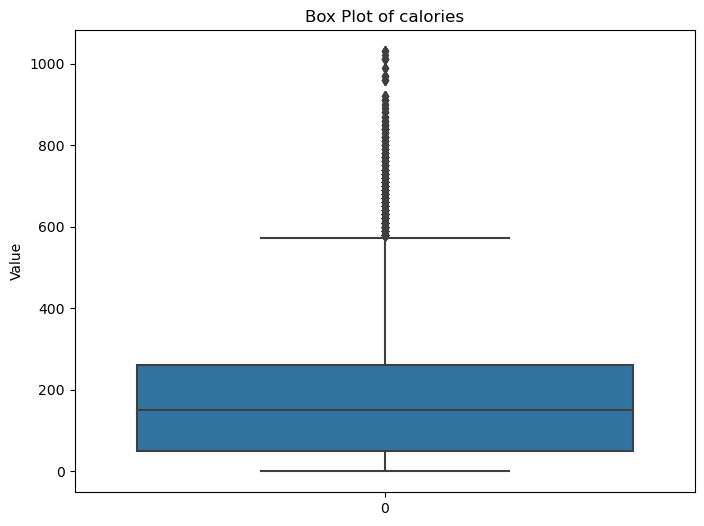

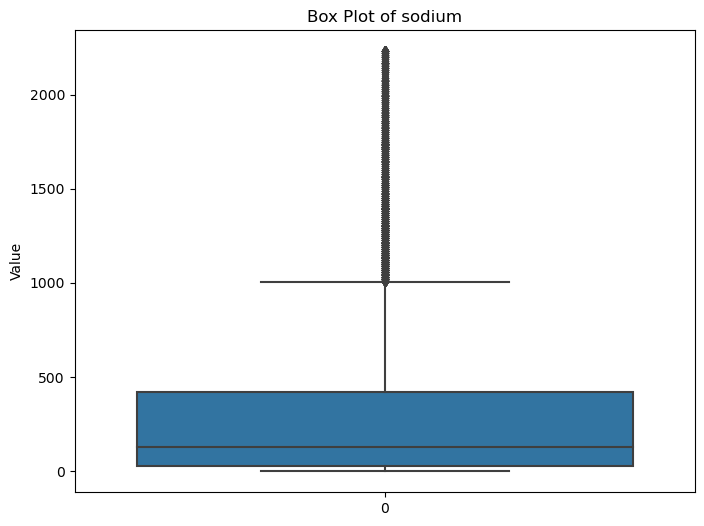

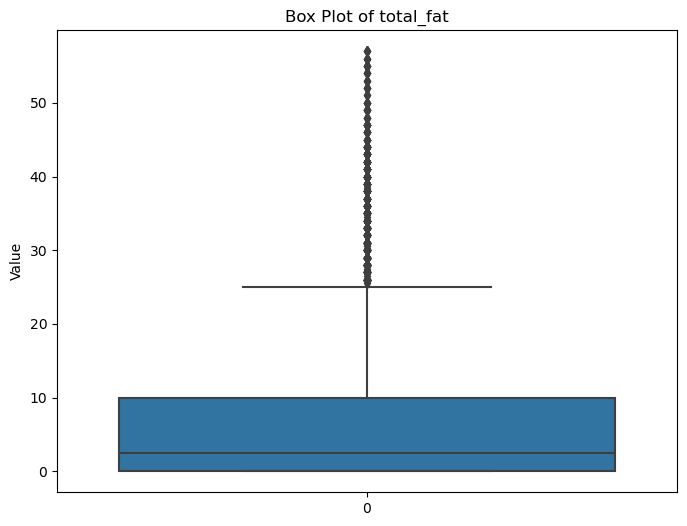

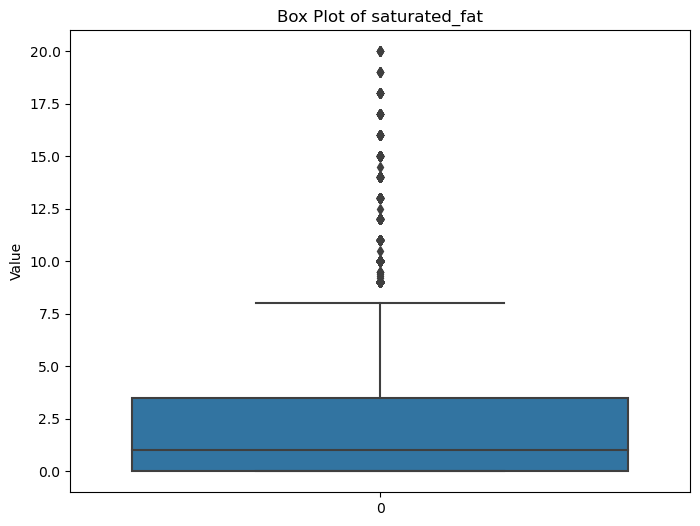

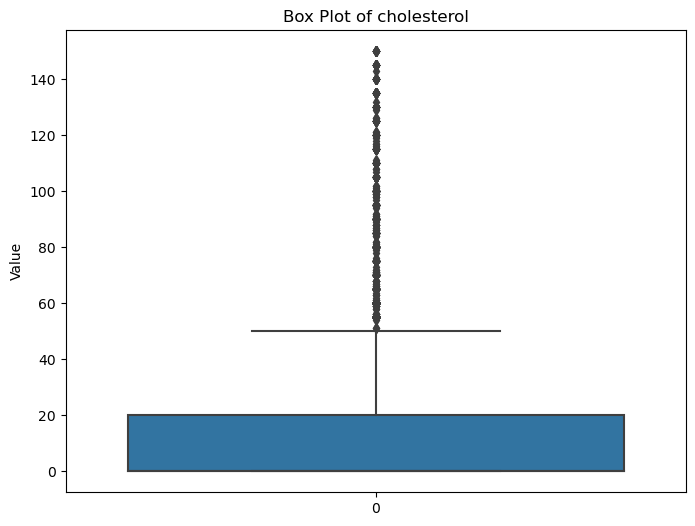

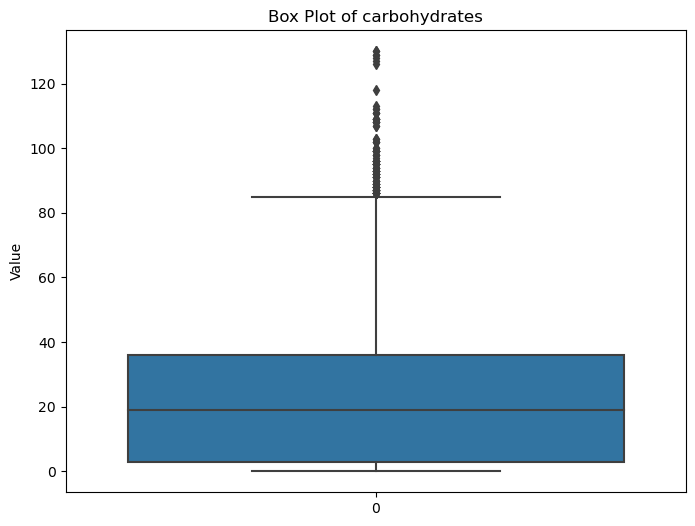

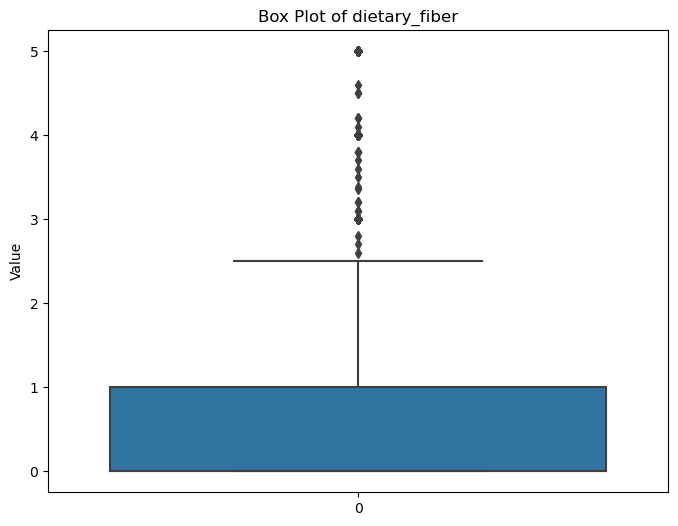

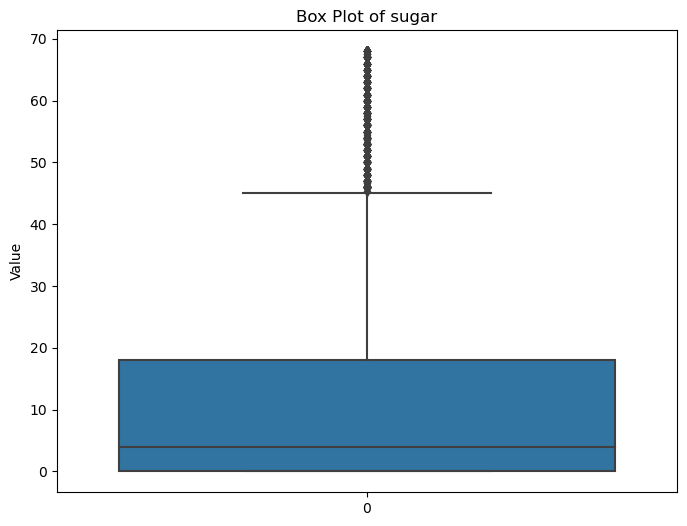

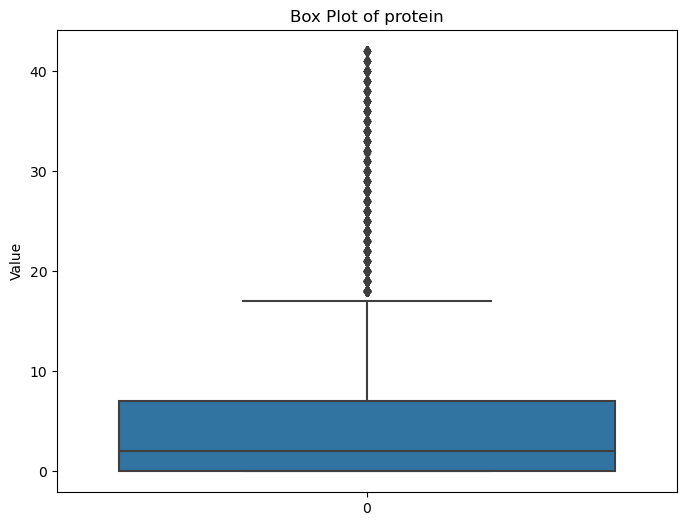

In [312]:
#box plots of continuous variables 
continuous_variables = ['calories', 'sodium', 'total_fat', 'saturated_fat', 'cholesterol', 'carbohydrates', 'dietary_fiber', 'sugar', 'protein']

#iterates through the columns to generate multiple box plots
for column in continuous_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[column])
    plt.title(f"Box Plot of {column}")
    plt.ylabel("Value")
    plt.show()

In [313]:
df.to_csv('data', index = False)

**Data dictionary**: The dataset contains key variables essential for analyzing menu item nutritional data. 'Menu_item_id' uniquely identifies each item, 'restaurant' enables comparisons, and 'food_category' aids category-based analysis. 'Item_name' provides specificity. Nutritional variables like 'calories', 'total_fat', 'saturated_fat', and 'trans_fat' offer insights into energy and lipid content. 'Cholesterol' and 'sodium' highlight health concerns, while 'carbohydrates', 'dietary_fiber', 'sugar', and 'protein' detail carbohydrate and protein composition, crucial for dietary assessment.

In [314]:
#creates a data dictionary with 3 colums: Variables, Data Type, and Description
data_dictionary = {
    'Variables': ["menu_item_id", "restaurant", "food_category", "item_name", "calories", "total_fat", "saturated_fat", "trans_fat", "cholesterol", "sodium", "carbohydrates", "dietary_fiber", "sugar", "protein"],
    'Data Type': ["int", "object", "object", "object", "float", "float", "float", "float", "float", "float", "float", "float", "float", "float"],
    'Description': ["Unique identifier for each menu item", "Restaurant name", "Category of food item", "Name of food item", "Calories in food item", "Total fat in food item (g)", "Saturated fat in food item (g)", "Trans fat in food item (g)", "Cholesterol in food item (g)", "Sodium in food item (mg)", "Carbohydrates in food item (g)", "Dietary fiber in food item (g)", "Sugar in food item (g)", "Protein in food item (g)"]
}

data_dictionary_df = pd.DataFrame(data_dictionary)
data_dictionary_df

,Variables,Data Type,Description
0,menu_item_id,int,Unique identifier for each menu item
1,restaurant,object,Restaurant name
2,food_category,object,Category of food item
3,item_name,object,Name of food item
4,calories,float,Calories in food item
5,total_fat,float,Total fat in food item (g)
6,saturated_fat,float,Saturated fat in food item (g)
7,trans_fat,float,Trans fat in food item (g)
8,cholesterol,float,Cholesterol in food item (g)
9,sodium,float,Sodium in food item (mg)


## **Component Brainstorming**

**UI Components Brainstorm**
1. **Search Bar for Menu Items**: allows users to search for specific menu items by name
2. **Nutritional Summary Panel**: dynamically updates to show summary statistics of the selected items
3. **Slider for Calorie Range Filtering**: allows users to filter menu items based on calorie range (can adjust minimum and maximum calorie thresholds)
4. **Restaurant Dropdown**: allows user to filter through items from a particular selection of restaurants
5. **Light mode/dark mode toggle**: allows users to switch between light mode and dark mode

**Visualizations Brainstorm**
1. **Area Chart of Nutritional Composition**: visualizes the composition of nutritional content (e.g., carbohydrates, protein, fat)  for each menu item
2. **Parallel Coordinates Plot for Nutritional Comparison**: parallel coordinates plot that enables users to compare the nutritional profiles of multiple menu items simultaneously
3. **Histogram of Calorie Distribution**: visualizes the distribution of calories across all menu items
4. **Stacked Bar Chart of Nutritional Content by Menu Item**: a stacked bar chart that visualizes the breakdown of nutritional ocnten for each menu item
5. **Heatmap of Correlation Matrix**: create a heatmap that visualizes the correlation matrix of nutritional values